<a href="https://colab.research.google.com/github/EricaSG/Capstone/blob/master/Colorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2129, done.
remote: Total 2129 (delta 0), reused 0 (delta 0), pack-reused 2129
Receiving objects: 100% (2129/2129), 69.36 MiB | 20.89 MiB/s, done.
Resolving deltas: 100% (965/965), done.


In [3]:
cd DeOldify

/content/DeOldify


In [4]:
from deoldify import device
from deoldify.device_id import DeviceId
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
  print('GPU not available.')

In [5]:
!pip install -r colab_requirements.txt

In [6]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message=".*?Your .*? set is empty.*?")

In [7]:
!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

--2020-08-30 16:04:13--  https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.1, 2620:100:6023:1::a27d:4301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth [following]
--2020-08-30 16:04:13--  https://www.dropbox.com/s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdb6aa2526a872a4b1c8875e00f.dl.dropboxusercontent.com/cd/0/inline/A-cb-CGtitUI46vlrwOhZxieeo03Rdd8-neJScItnuaIJJDW-ygqUmpOCt6ifivb7or7QCXt4fR98VVuIyD1mOy-zUlR_wolKf79hugGYDiUyA/file# [following]
--2020-08-30 16:04:14--  https://ucdb6aa2526a872a4b1c8875e00f.dl.dropboxusercontent.com/cd/0/inline/A-cb-CGtitUI46vlrwOhZxieeo03Rdd8-neJScItnuaIJJDW-ygqUmpOCt6ifivb7or7QCXt4fR98VVuIyD1mOy-zUl

In [8]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2020-08-30 16:04:37--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2020-08-30 16:04:37 (39.9 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [9]:
colorizer = get_image_colorizer(artistic=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


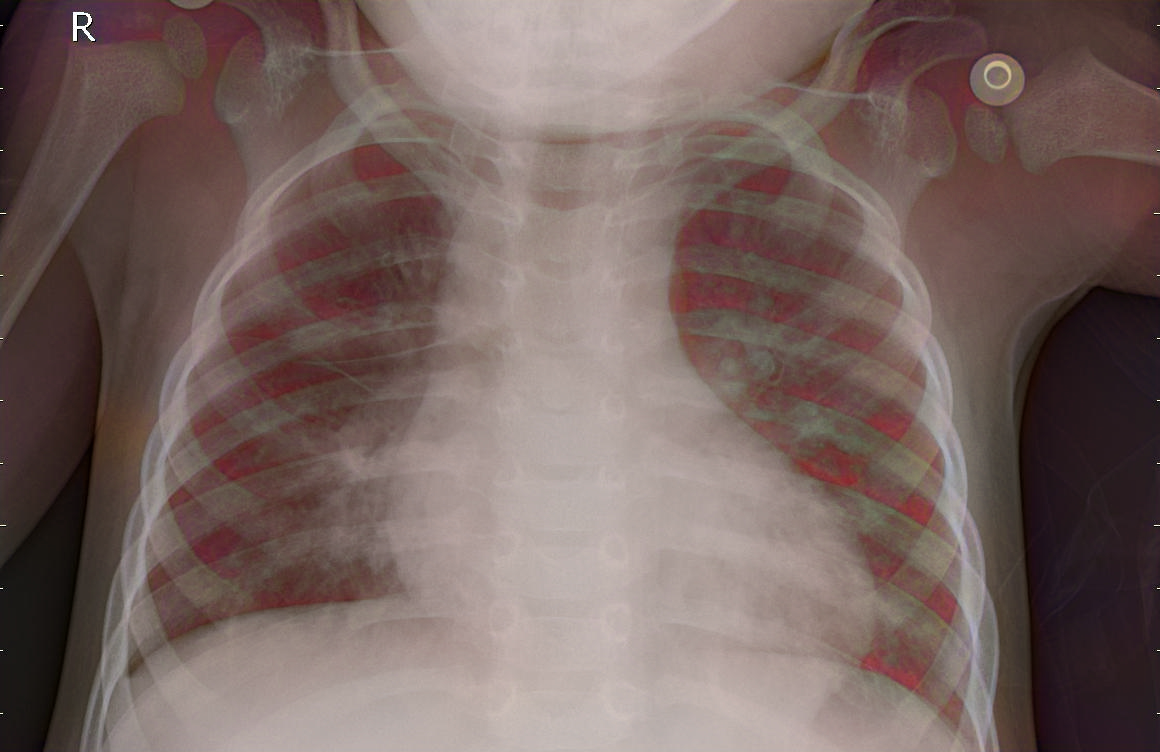

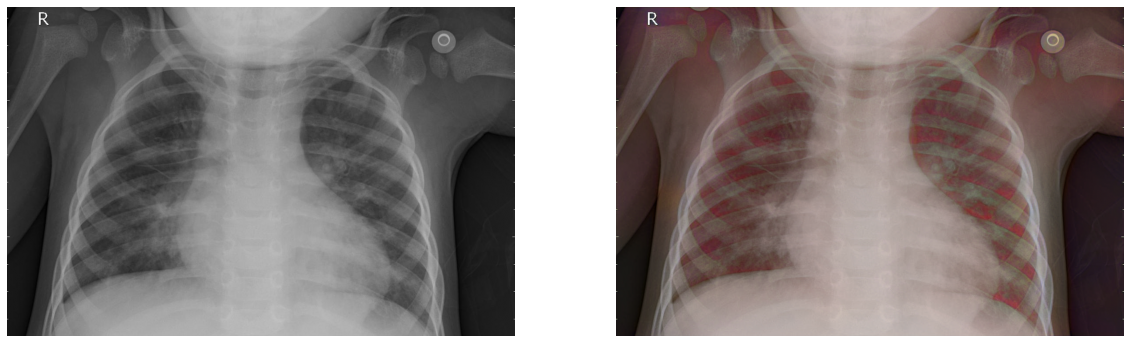

In [122]:
source_url = 'https://i.imgur.com/aDJ7Umd.jpg' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')